Saving churn_results.csv to churn_results (1).csv


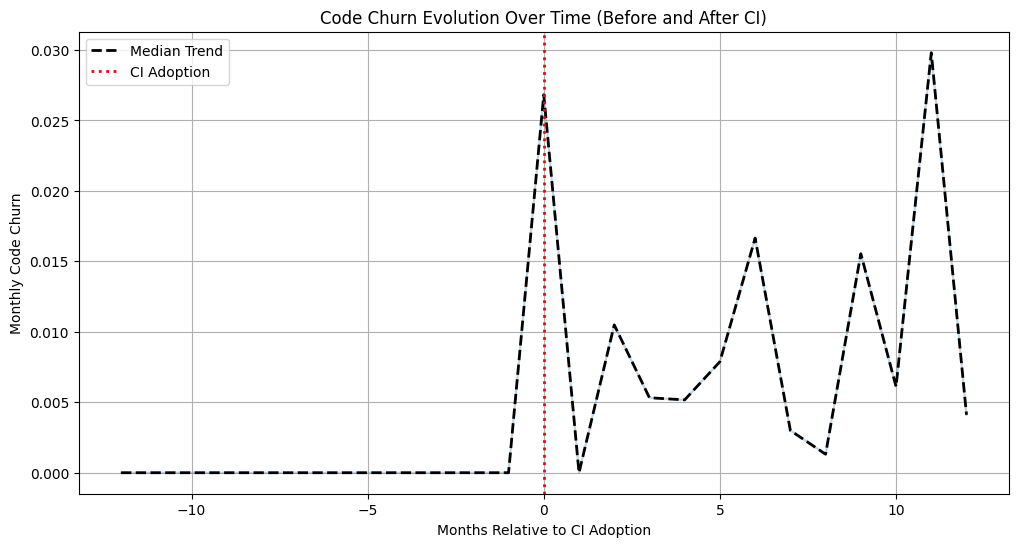

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import files

uploaded = files.upload()

file_name = list(uploaded.keys())[0]
df_raw = pd.read_csv(file_name, header=None)

df_cleaned = df_raw.iloc[1:, :].copy()
df_cleaned.columns = ["repo", "month", "metric", "churn"]

df_cleaned = df_cleaned[df_cleaned["metric"] == "Churn Rate"].copy()
df_cleaned["churn"] = pd.to_numeric(df_cleaned["churn"], errors="coerce")

df_cleaned.reset_index(drop=True, inplace=True)

df_cleaned["time_index"] = df_cleaned.groupby("repo").cumcount() - 12

plt.figure(figsize=(12, 6))

sns.lineplot(data=df_cleaned, x="time_index", y="churn", hue="repo", alpha=0.3, legend=False)

median_trend = df_cleaned.groupby("time_index")["churn"].median()
plt.plot(median_trend.index, median_trend.values, color="black", linestyle="--", linewidth=2, label="Median Trend")

plt.axvline(x=0, color="red", linestyle=":", linewidth=2, label="CI Adoption")

plt.xlabel("Months Relative to CI Adoption")
plt.ylabel("Monthly Code Churn")
plt.title("Code Churn Evolution Over Time (Before and After CI)")
plt.legend()
plt.grid(True)

plt.show()

Upload file 1/10:


Saving churn_results.csv to churn_results (74).csv
Upload file 2/10:


Saving churn_results.csv to churn_results (75).csv
Upload file 3/10:


Saving churn_results.csv to churn_results (76).csv
Upload file 4/10:


Saving churn_results.csv to churn_results (77).csv
Upload file 5/10:


Saving churn_results.csv to churn_results (78).csv
Upload file 6/10:


Saving churn_results.csv to churn_results (79).csv
Upload file 7/10:


Saving churn_results.csv to churn_results (80).csv
Upload file 8/10:


Saving churn_results.csv to churn_results (81).csv
Upload file 9/10:


Saving churn_results.csv to churn_results (82).csv
Upload file 10/10:


Saving churn_results.csv to churn_results (83).csv
✅ All 10 files uploaded successfully!


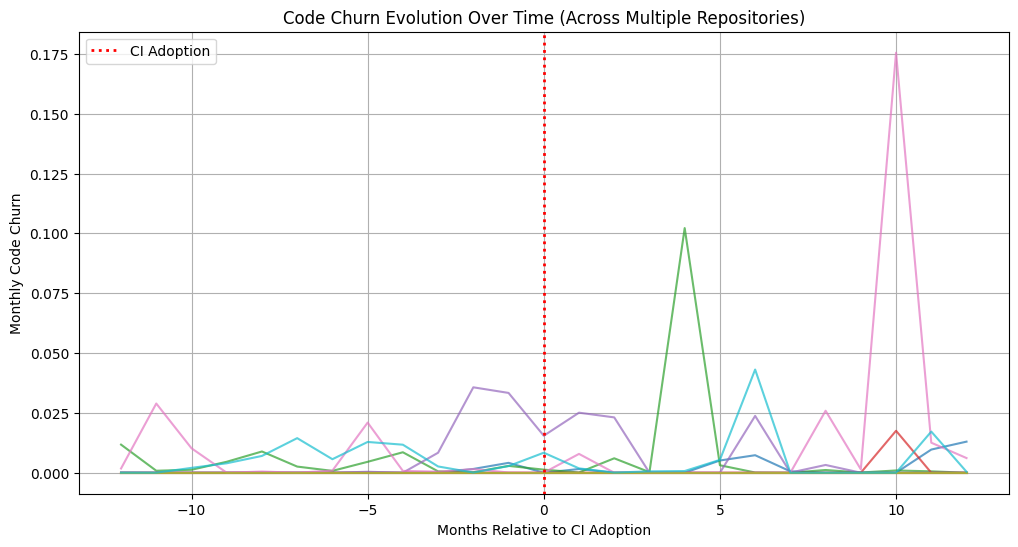

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import files

uploaded_files = {}

for i in range(10):
    print(f"Upload file {i+1}/10:")
    uploaded = files.upload()
    uploaded_files.update(uploaded)  # Store all uploaded files

print("All 10 files uploaded successfully!")

all_data = []

for file_name in uploaded_files.keys():
    df_raw = pd.read_csv(file_name, header=None)
    df_cleaned = df_raw.iloc[1:, :].copy()
    df_cleaned.columns = ["repo", "month", "metric", "churn"]
    df_cleaned = df_cleaned[df_cleaned["metric"] == "Churn Rate"].copy()
    df_cleaned["churn"] = pd.to_numeric(df_cleaned["churn"], errors="coerce")
    df_cleaned["time_index"] = df_cleaned.groupby("repo").cumcount() - 12
    all_data.append(df_cleaned)

df_combined = pd.concat(all_data, ignore_index=True)

plt.figure(figsize=(12, 6))

palette = sns.color_palette("tab10", n_colors=len(df_combined["repo"].unique()))
sns.lineplot(data=df_combined, x="time_index", y="churn", hue="repo", palette=palette, alpha=0.7, legend=False)

plt.axvline(x=0, color="red", linestyle=":", linewidth=2, label="CI Adoption")

plt.xlabel("Months Relative to CI Adoption")
plt.ylabel("Monthly Code Churn")
plt.title("Code Churn Evolution Over Time (Across Multiple Repositories)")
plt.legend()
plt.grid(True)

plt.show()


Upload file 1/10:


Saving churn_results.csv to churn_results (34).csv
Upload file 2/10:


Saving churn_results.csv to churn_results (35).csv
Upload file 3/10:


Saving churn_results.csv to churn_results (36).csv
Upload file 4/10:


Saving churn_results.csv to churn_results (37).csv
Upload file 5/10:


Saving churn_results.csv to churn_results (38).csv
Upload file 6/10:


Saving churn_results.csv to churn_results (39).csv
Upload file 7/10:


Saving churn_results.csv to churn_results (40).csv
Upload file 8/10:


Saving churn_results.csv to churn_results (41).csv
Upload file 9/10:


Saving churn_results.csv to churn_results (42).csv
Upload file 10/10:


Saving churn_results.csv to churn_results (43).csv
✅ All 10 files uploaded successfully!


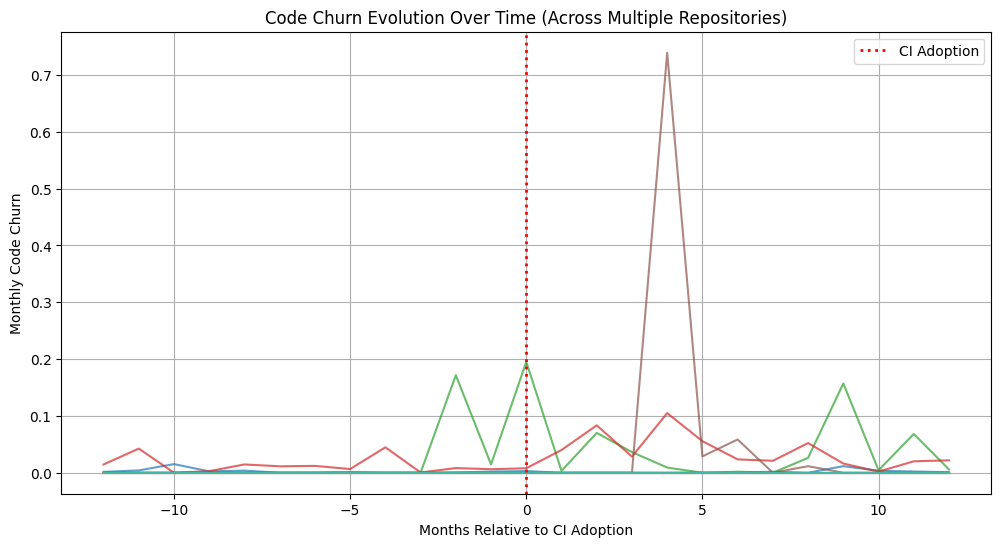

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import files

uploaded_files = {}

for i in range(10):
    print(f"Upload file {i+1}/10:")
    uploaded = files.upload()
    uploaded_files.update(uploaded)  # Store all uploaded files

print("All 10 files uploaded successfully!")

all_data = []

for file_name in uploaded_files.keys():
    df_raw = pd.read_csv(file_name, header=None)
    df_cleaned = df_raw.iloc[1:, :].copy()
    df_cleaned.columns = ["repo", "month", "metric", "churn"]
    df_cleaned = df_cleaned[df_cleaned["metric"] == "Churn Rate"].copy()
    df_cleaned["churn"] = pd.to_numeric(df_cleaned["churn"], errors="coerce")
    df_cleaned["time_index"] = df_cleaned.groupby("repo").cumcount() - 12
    all_data.append(df_cleaned)

df_combined = pd.concat(all_data, ignore_index=True)

plt.figure(figsize=(12, 6))

palette = sns.color_palette("tab10", n_colors=len(df_combined["repo"].unique()))
sns.lineplot(data=df_combined, x="time_index", y="churn", hue="repo", palette=palette, alpha=0.7, legend=False)

plt.axvline(x=0, color="red", linestyle=":", linewidth=2, label="CI Adoption")

plt.xlabel("Months Relative to CI Adoption")
plt.ylabel("Monthly Code Churn")
plt.title("Code Churn Evolution Over Time (Across Multiple Repositories)")
plt.legend()
plt.grid(True)

plt.show()

In [ ]:
import pandas as pd

file_path = "/content/churn_analysis_results_filtered.csv"
df = pd.read_csv(file_path)
df_filtered = df[(df["mean_churn_before"] > 0) | (df["mean_churn_after"] > 0)]
mean_churn_before = df_filtered["mean_churn_before"].mean()
mean_churn_after = df_filtered["mean_churn_after"].mean()
mean_t_stat = df_filtered["t_stat"].mean()
mean_p_ttest = df_filtered["p_ttest"].mean()
mean_w_stat = df_filtered["w_stat"].mean()
mean_p_wilcoxon = df_filtered["p_wilcoxon"].mean()

print(f"Mean Churn Before CI: {mean_churn_before:.6f}")
print(f"Mean Churn After CI: {mean_churn_after:.6f}")
print(f"Mean t-statistic: {mean_t_stat:.4f}")
print(f"Mean p-value (t-test): {mean_p_ttest:.4f}")
print(f"Mean Wilcoxon stat: {mean_w_stat:.2f}")
print(f"Mean p-value (Wilcoxon test): {mean_p_wilcoxon:.4f}")

Mean Churn Before CI: 0.019177
Mean Churn After CI: 0.071376
Mean t-statistic: -0.4518
Mean p-value (t-test): 0.4206
Mean Wilcoxon stat: 11.34
Mean p-value (Wilcoxon test): 0.4856


In [ ]:
from scipy.stats import mannwhitneyu
import numpy as np

cohen_d = (df_filtered["mean_churn_after"].mean() - df_filtered["mean_churn_before"].mean()) / df_filtered["mean_churn_before"].std()

def cliffs_delta(before, after):
    n = len(before) * len(after)
    greater = sum(x > y for x in before for y in after)
    lesser = sum(x < y for x in before for y in after)
    return (greater - lesser) / n

cliffs_d = cliffs_delta(df_filtered["mean_churn_before"], df_filtered["mean_churn_after"])

{
    "Cohen's d": cohen_d,
    "Cliff's Delta": cliffs_d
}


{"Cohen's d": 0.6979921814207263, "Cliff's Delta": -0.22437673130193905}

In [ ]:
import pandas as pd
from scipy.stats import pearsonr, spearmanr

file_path = "/content/churn_analysis_results.csv"
df = pd.read_csv(file_path)

df_filtered = df[(df["mean_churn_before"] > 0) | (df["mean_churn_after"] > 0)].copy()

df_filtered["churn_change"] = df_filtered["mean_churn_after"] - df_filtered["mean_churn_before"]

pearson_corr, pearson_p = pearsonr(df_filtered["mean_churn_before"], df_filtered["churn_change"])

spearman_corr, spearman_p = spearmanr(df_filtered["mean_churn_before"], df_filtered["churn_change"])
correlation_results = {
    "Pearson Correlation": pearson_corr,
    "Pearson p-value": pearson_p,
    "Spearman Correlation": spearman_corr,
    "Spearman p-value": spearman_p
}

print(correlation_results)


{'Pearson Correlation': 0.487288139685421, 'Pearson p-value': 0.0019167544910170574, 'Spearman Correlation': -0.15425122945327094, 'Spearman p-value': 0.3551453128964912}
